<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Libraries" data-toc-modified-id="Import-Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import Libraries</a></span></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span></li><li><span><a href="#Model-Training" data-toc-modified-id="Model-Training-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Model Training</a></span></li><li><span><a href="#Selecting-Best-model" data-toc-modified-id="Selecting-Best-model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Selecting Best model</a></span></li><li><span><a href="#Finalizing-and-Saving-Model" data-toc-modified-id="Finalizing-and-Saving-Model-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Finalizing and Saving Model
    </a></span></li></ul></div>

### Importing Libraries

In [1]:
#import the required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 

# For Modeling
from pycaret.classification import predict_model
from IPython.display import display, HTML
from sklearn.preprocessing import LabelEncoder
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report
from sklearn.feature_selection import SelectKBest
from xgboost import XGBClassifier
from collections import Counter
from imblearn.combine import SMOTEENN

%matplotlib inline

plt.style.use('default')
import warnings
warnings.filterwarnings("ignore")

#### Reading data

In [2]:
df = pd.read_csv('tel_churn_clean.csv')
df.head()

,Unnamed: 0,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,1,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,2,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,3,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,4,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


In [3]:
x = df.drop('Churn',axis=1)
x

,Unnamed: 0,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50
7028,7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90
7029,7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45
7030,7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60


In [4]:
y = df['Churn']
y

0       0
1       0
2       1
3       0
4       1
       ..
7027    0
7028    0
7029    0
7030    1
7031    0
Name: Churn, Length: 7032, dtype: int64

In [5]:
#its imbalance dataset
y.value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

## Test Split

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [7]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((5625, 20), (5625,), (1407, 20), (1407,))

In [8]:
#its imbalance dataset
y.value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [9]:
def evaluate_model_performance(model,test_data):
    prediction=model.predict(test_data)
    #print("Training Accurary : ",model.score(x_train,y_train))
    print("Validation Accurary : {:.2f} %".format(accuracy_score(y_test,prediction)))
    print("Precision Score : {:.2f} %".format(precision_score(y_test,prediction)))
    print("Recall Score : {:.2f} %".format(recall_score(y_test,prediction)))
    print("F1 Score : {:.2f} %".format(f1_score(y_test,prediction)))
    print(classification_report(y_test,prediction))

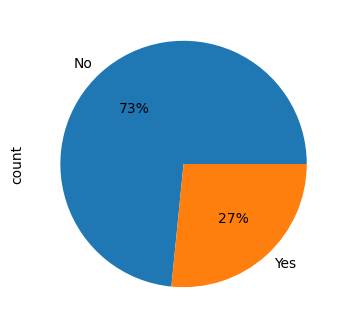

In [10]:
plt.figure(figsize=(8,4))
y.value_counts().plot(kind="pie",autopct="%1.f%%",labels=['No','Yes'])
plt.show()

we have 2 classes class 0 and class 1.
class 0 - majority class
class 1 -minority class

### Upsampling + ENN

In [11]:
# Print the class distribution before applying SMOTE-ENN
print("Before SMOTE-ENN:", Counter(y))

# Apply SMOTE-ENN
smote = SMOTEENN(random_state=42)
x_st, y_st = smote.fit_resample(x, y)

# Print the class distribution after applying SMOTE-ENN
print("After SMOTE-ENN:", Counter(y_st))


Before SMOTE-ENN: Counter({0: 5163, 1: 1869})
After SMOTE-ENN: Counter({1: 2827, 0: 2186})


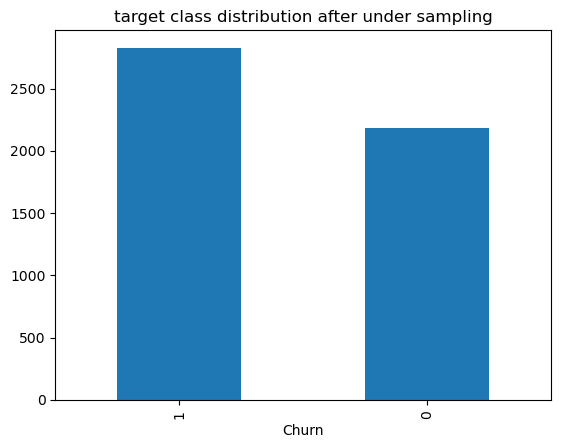

In [12]:
y_st.value_counts().plot(kind="bar")
plt.title("target class distribution after under sampling")
plt.show()

In [13]:
y_st.value_counts()

Churn
1    2827
0    2186
Name: count, dtype: int64

since we have performed SMOTEENN (combination of Smote + ENN) sampling method and we can see our dataset is nearly balanced

In [14]:
#now split training and validation set using balanced dataset
x_train,x_test,y_train,y_test=train_test_split(x_st,y_st,test_size=0.2,random_state=42)

In [15]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((4010, 20), (4010,), (1003, 20), (1003,))

Building Model with Balanced Dataset and performance hyper parameter tuning using RandomSearchCV

# Model Training

## 1. Random Forest Classifier

In [16]:
param_grid={'n_estimators':[40,80,120,160,200],
            'max_depth':[2,4,6,8,10],
            "criterion":['gini'],
            "random_state":[27,42,43]
            }
random_search_cv=RandomizedSearchCV( estimator=RandomForestClassifier(), param_distributions=param_grid,n_iter=12,cv=5,scoring='f1',verbose=1)
random_search_cv.fit(x_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=12,
                   param_distributions={'criterion': ['gini'],
                                        'max_depth': [2, 4, 6, 8, 10],
                                        'n_estimators': [40, 80, 120, 160, 200],
                                        'random_state': [27, 42, 43]},
                   scoring='f1', verbose=1)

In [17]:
random_search_cv.best_params_

{'random_state': 27, 'n_estimators': 120, 'max_depth': 10, 'criterion': 'gini'}

In [18]:
print('Best Parameters:', random_search_cv.best_params_)

Best Parameters: {'random_state': 27, 'n_estimators': 120, 'max_depth': 10, 'criterion': 'gini'}


In [19]:
#Get final model with best param from RandomizedSearchCV
rf_final_model=random_search_cv.best_estimator_

In [20]:
#evaluate Random Forest Classifier
evaluate_model_performance(rf_final_model,x_test)

Validation Accurary : 0.92 %
Precision Score : 0.90 %
Recall Score : 0.95 %
F1 Score : 0.92 %
              precision    recall  f1-score   support

           0       0.93      0.88      0.90       456
           1       0.90      0.95      0.92       547

    accuracy                           0.92      1003
   macro avg       0.92      0.91      0.91      1003
weighted avg       0.92      0.92      0.91      1003



## 2. XGBoost Classifier

In [21]:
# Define the parameter grid for XGBoost
param_grid = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [2, 4, 6, 8],
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.1, 0.5, 1.0],
    'reg_lambda': [0, 0.1, 0.5, 1.0],
    'objective': ['binary:logistic']
}

# Create RandomizedSearchCV for XGBoost
RandomizedSearch_xg_cv = RandomizedSearchCV(
    estimator=XGBClassifier(random_state=42),
    param_distributions=param_grid,
    cv=5,
    scoring='accuracy',
    random_state=42
)

# Fit RandomizedSearchCV
RandomizedSearch_xg_cv.fit(x_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           random_state=42, ...),
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8, 0.9,
                                                             1.0],
                                        'gamma': [0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.001, 0.01, 0.1,
                                                          0.2],
                                        'max_depth': [2, 4, 6, 8],
                                        'n_estimators': [100, 150, 200, 250,
                                                         300],
                                        'objective': ['binary:logistic'],
                                        'reg_alpha': [0, 0.1, 0.5, 1.0],
                                        'reg_lambda': [0, 0.1, 0.5, 1.0],
                                        'subsample': [0.6, 0.7, 0.8, 0.9, 1.0]},
                   random_state=42, scoring='accuracy')

In [22]:
RandomizedSearch_xg_cv.best_params_

{'subsample': 0.8,
 'reg_lambda': 0.5,
 'reg_alpha': 0,
 'objective': 'binary:logistic',
 'n_estimators': 300,
 'max_depth': 4,
 'learning_rate': 0.1,
 'gamma': 0,
 'colsample_bytree': 1.0}

In [23]:
print('Best Parameters:', RandomizedSearch_xg_cv.best_params_)

Best Parameters: {'subsample': 0.8, 'reg_lambda': 0.5, 'reg_alpha': 0, 'objective': 'binary:logistic', 'n_estimators': 300, 'max_depth': 4, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 1.0}


In [24]:
xg_smote_model=RandomizedSearch_xg_cv.best_estimator_

In [25]:
#evaluate Random Forest Classifier
evaluate_model_performance(xg_smote_model,x_test)

Validation Accurary : 0.92 %
Precision Score : 0.92 %
Recall Score : 0.94 %
F1 Score : 0.93 %
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       456
           1       0.92      0.94      0.93       547

    accuracy                           0.92      1003
   macro avg       0.92      0.92      0.92      1003
weighted avg       0.92      0.92      0.92      1003



## 3. Gradient Boosting Classifier

In [26]:
param_grid = {
    'n_estimators':[100, 150, 200, 250, 300],
    'criterion': ['friedman_mse', 'squared_error', 'mse', 'mae'],
    'max_depth': [2, 4, 6, 8],
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'loss': ['deviance', 'exponential']
}

RandomizedSearch_cv = RandomizedSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_distributions=param_grid,  # Use param_distributions instead of param_grid
    cv=5,
    scoring='accuracy',
    random_state=42
)

RandomizedSearch_cv.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
                   param_distributions={'criterion': ['friedman_mse',
                                                      'squared_error', 'mse',
                                                      'mae'],
                                        'learning_rate': [0.001, 0.01, 0.1,
                                                          0.2],
                                        'loss': ['deviance', 'exponential'],
                                        'max_depth': [2, 4, 6, 8],
                                        'n_estimators': [100, 150, 200, 250,
                                                         300]},
                   random_state=42, scoring='accuracy')

In [27]:
RandomizedSearch_cv.best_params_

{'n_estimators': 250,
 'max_depth': 8,
 'loss': 'exponential',
 'learning_rate': 0.2,
 'criterion': 'friedman_mse'}

In [28]:
print('Best Parameters:', RandomizedSearch_cv.best_params_)

Best Parameters: {'n_estimators': 250, 'max_depth': 8, 'loss': 'exponential', 'learning_rate': 0.2, 'criterion': 'friedman_mse'}


In [29]:
gb_smote_model=RandomizedSearch_cv.best_estimator_

In [30]:
#evaluate Random Forest Classifier
evaluate_model_performance(gb_smote_model,x_test)

Validation Accurary : 0.92 %
Precision Score : 0.92 %
Recall Score : 0.94 %
F1 Score : 0.93 %
              precision    recall  f1-score   support

           0       0.93      0.90      0.91       456
           1       0.92      0.94      0.93       547

    accuracy                           0.92      1003
   macro avg       0.92      0.92      0.92      1003
weighted avg       0.92      0.92      0.92      1003



In [31]:
#gb_smote_model = GradientBoostingClassifier(n_estimators=250, max_depth=8, loss='exponential', learning_rate=0.2, criterion='friedman_mse')

### Save the model

In [32]:
from sklearn.ensemble import GradientBoostingClassifier
import joblib

joblib.dump(gb_smote_model, 'Bi_gradient_boosting_model.joblib')
loaded_model = joblib.load('Bi_gradient_boosting_model.joblib')

# Data Analysis for Power BI

In [33]:
#Load final model
from sklearn.ensemble import GradientBoostingClassifier
import joblib
loaded_model = joblib.load('Bi_gradient_boosting_model.joblib')

In [34]:
#original data
import pandas as pd

df1 = pd.read_csv("Telco-Customer-Churn.csv")
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [35]:
import pandas as pd
#load data that used for model prediction
df2 = pd.read_csv('tel_churn_clean.csv')

df2.drop('Churn',axis=1,inplace=True)
df2.head()

,Unnamed: 0,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65


In [36]:
df2

,Unnamed: 0,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50
7028,7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90
7029,7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45
7030,7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60


# Prediction Score for analysis

In [37]:
#By using our predicton model Gradient Boosting

prediction = loaded_model.predict_proba(df2)

In [38]:
prediction

array([[3.59898450e-04, 9.99640102e-01],
       [1.00000000e+00, 1.43393330e-15],
       [3.18123305e-12, 1.00000000e+00],
       ...,
       [9.99964188e-01, 3.58120126e-05],
       [3.50743878e-11, 1.00000000e+00],
       [1.00000000e+00, 5.35885487e-11]])

In [39]:
len(prediction)

7032

In [40]:
Prob_Score_for_1 = prediction
Prob_Score_for_0 = prediction

In [41]:
df = pd.DataFrame({'Prob Score for 1': [item[1] for item in prediction],
                   'Prob Score for 0': [item[0] for item in prediction]})

In [42]:
pd.options.display.float_format = '{:.8f}'.format

In [43]:
df

,Prob Score for 1,Prob Score for 0
0,0.99964010,0.00035990
1,0.00000000,1.00000000
2,1.00000000,0.00000000
3,0.00000000,1.00000000
4,1.00000000,0.00000000
...,...,...
7027,0.00000000,1.00000000
7028,0.00000000,1.00000000
7029,0.00003581,0.99996419
7030,1.00000000,0.00000000


In [44]:
df1

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85000000,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95000000,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85000000,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30000000,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70000000,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80000000,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20000000,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60000000,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40000000,306.6,Yes


In [45]:
final = pd.concat([df1,df],axis=1)

In [46]:
final

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Prob Score for 1,Prob Score for 0
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85000000,29.85,No,0.99964010,0.00035990
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95000000,1889.5,No,0.00000000,1.00000000
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85000000,108.15,Yes,1.00000000,0.00000000
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30000000,1840.75,No,0.00000000,1.00000000
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70000000,151.65,Yes,1.00000000,0.00000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,One year,Yes,Mailed check,84.80000000,1990.5,No,NaN,NaN
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,Yes,One year,Yes,Credit card (automatic),103.20000000,7362.9,No,NaN,NaN
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.60000000,346.45,No,NaN,NaN
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,Month-to-month,Yes,Mailed check,74.40000000,306.6,Yes,NaN,NaN


### Save file for Power BI analysis

In [47]:
final.to_csv('Telco-Customer-Churn_Analysis.csv')